# 模型对比

组合方式：
- 1. Base
    - 1.1: default_tree_learner
    - 1.2: default_linear_learner(ridge)
    - 1.3: lasso_learner
    - 1.4: kernel_ridge_learner
    - 1.5: linear_svr_learner
        
- 2. ESN + Base:
    - 2.1 esn_ridge_learner
    - 2.2 esn_kernel_ridge_learner
    - 2.3 esn_linear_svr_learner
    
- 3. NGBoost(Base):
    - model_test(Base)

- 4. NGBoost(ESN + Base):
    - model_test(ESN + Base)

- 5. ESN + NGBoost(Base):
    - esn_model_test(Base)
    
   

In [3]:
import sys
sys.path.append('/Users/apple/Documents/ML_Project/ML - 2.1/module')
from utils import *
from ngboost.learners import *
from sklearn.metrics import mean_squared_error
import numpy as np
from tqdm.notebook import tqdm as tqdm
%config InlineBackend.figure_format='retina'

X_train, X_test, Y_train, Y_test = get_data(hour_num=0, transform='sin+cos',
                                            test_index=[14389, 15389],
                                            drop_time=True, scale=True)

/Users/apple/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


get_data(hour_num=0, transform='sin+cos', drop_time=True, scale=True)

Input space:  Index(['wind_speed', 'sin(wd)', 'cos(wd)'], dtype='object') 




best alpha: 0.99


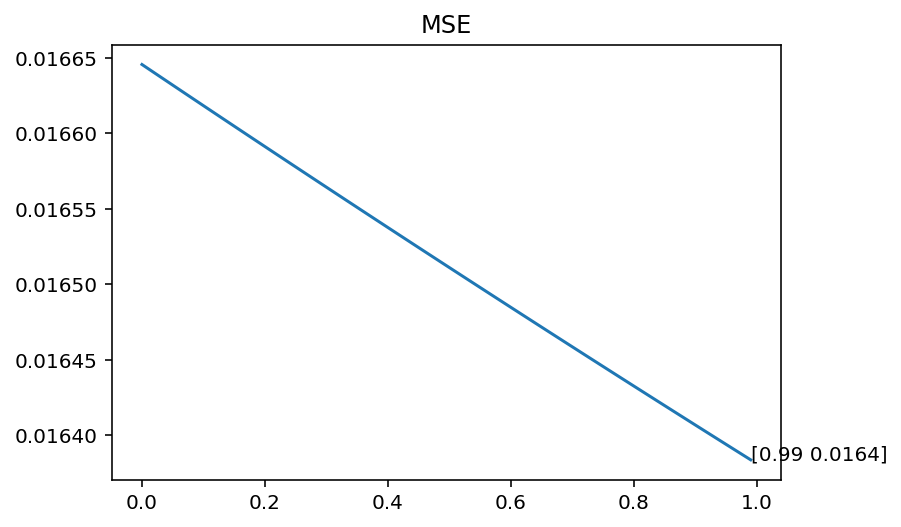

In [4]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
mse_list = []
for alpha in tqdm(np.arange(0,1,0.01)):
    Y_pred = Ridge(alpha=alpha).fit(X_train, Y_train).predict(X_test)
    mse = mean_squared_error(Y_pred, Y_test)
    mse_list.append(mse)
Series = pd.Series(mse_list, index=np.arange(0,1,0.01), name='mse')
Series.plot(title='MSE')
show_min = '['+str(Series.idxmin())+' '+str(round(Series.min(), 4))+']'
plt.annotate(show_min,xytext=(Series.idxmin(),Series.min())
             ,xy=(Series.idxmin(),Series.min()))
print('best alpha:', Series.idxmin())

In [26]:
default_param = {'n_readout': 1000, 
                 'n_components': 100, 
                 'damping': 0.5, 
                 'weight_scaling': 0.9, 
                 'alpha': 1}

GA_param = {'n_readout': 3462, 
             'n_components': 23, 
             'damping': 0.26215546327467487, 
             'weight_scaling': 0.6234509481681756, 
             'alpha': 0.4649085531487292}

## ridge

### default


Test MSE: 0.016381212388864117


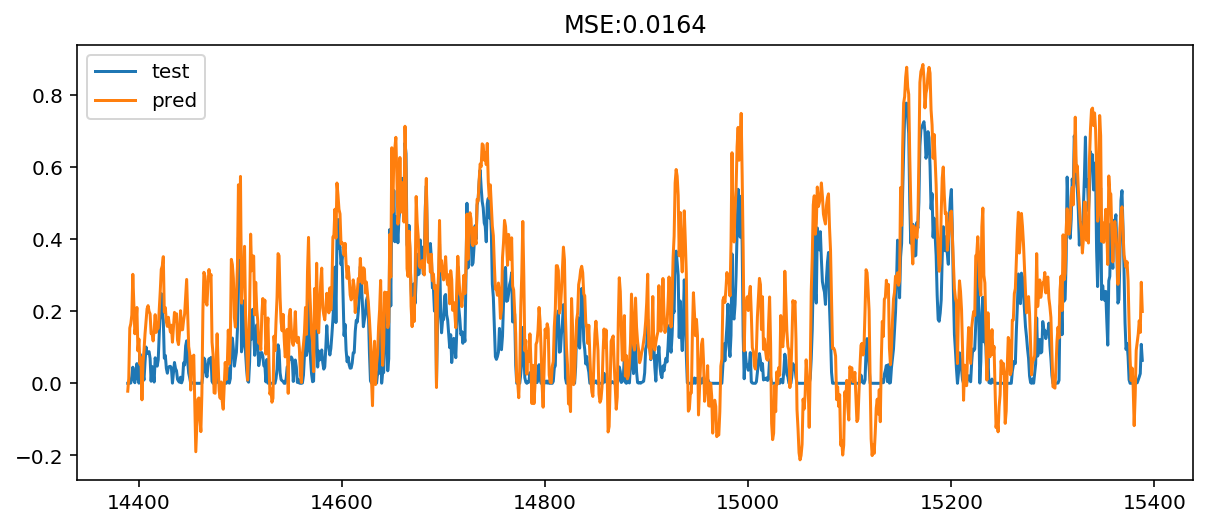

In [59]:
from sklearn.linear_model import Ridge

mse_list = []
for i in tqdm(range(100)):
    Y_pred = Ridge(alpha=1).fit(X_train, Y_train).predict(X_test)
    mse = mean_squared_error(Y_pred, Y_test)
    mse_list.append(mse)

print('Test MSE:', np.mean(mse_list)) # 0.01664264688521998

pd.DataFrame({'test':Y_test, 'pred':Y_pred})\
.plot(figsize=(10,4), title='MSE:{}'.format(round(np.mean(mse_list),4)))

## esn + ridge

In [60]:
def esn_ridge_learner_test(param):
    mse_list = []
    for i in tqdm(range(100)):
        esn = esn_ridge_learner(
                    n_readout = param['n_readout'],
                    n_components = param['n_components'],
                    damping = param['damping'],
                    weight_scaling = param['weight_scaling'],
                    alpha = param['alpha']).fit(X_train, Y_train)
        Y_pred = esn.predict(X_test)
        mse = mean_squared_error(Y_pred, Y_test)
        mse_list.append(mse)
    print('Test MSE:', np.mean(mse_list)) # 0.0164576028774735
    pd.DataFrame({'test':Y_test, 'pred':Y_pred})\
    .plot(figsize=(10,4), title='MSE:{}'.format(round(np.mean(mse_list),4)))

### default


Test MSE: 0.016413016419830298


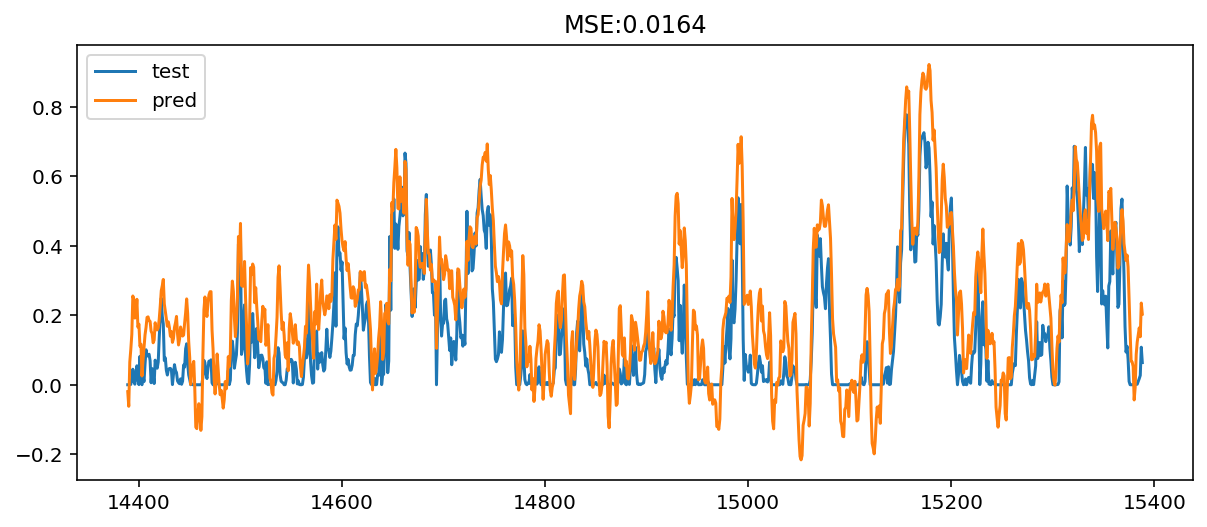

In [61]:
esn_ridge_learner_test(default_param)

### GA


Test MSE: 0.016440854213573736


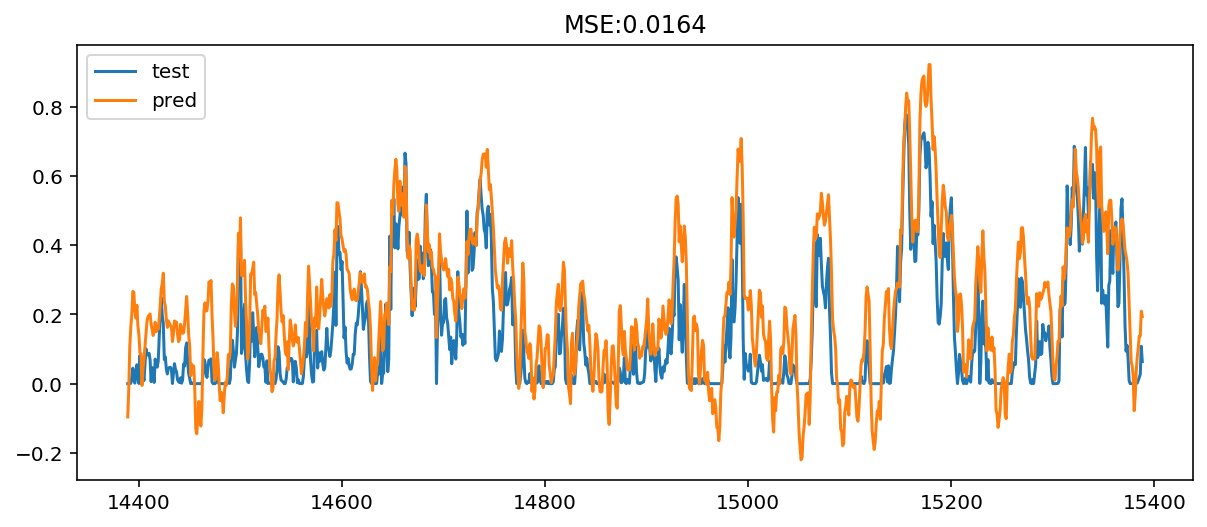

In [63]:
esn_ridge_learner_test(GA_param)

## ngboost( ridge )

### default

NGBRegressor(Base=Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
                        normalize=False, random_state=None, solver='auto',
                        tol=0.001),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=100) 

[iter 0] loss=0.0535 val_loss=0.0000 scale=0.5000 norm=0.2703
[iter 100] loss=-0.2817 val_loss=0.0000 scale=0.1250 norm=0.0631
[iter 200] loss=-0.3040 val_loss=0.0000 scale=0.0312 norm=0.0159
[iter 300] loss=-0.3053 val_loss=0.0000 scale=0.0078 norm=0.0040
[iter 400] loss=-0.3054 val_loss=0.0000 scale=0.0020 norm=0.0010

Test MSE 0.012661682696488053
Test NLL -0.47321500949930045


0.012661682696488053

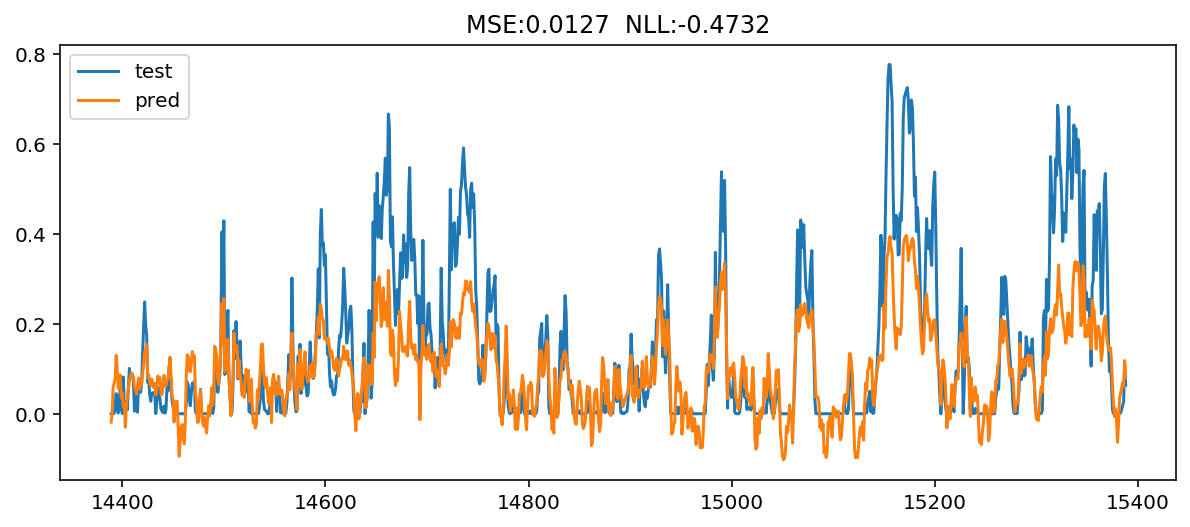

In [6]:
model_test(Base=default_linear_learner(alpha=1),
            n_estimators=500, verbose_eval=100,
            X_train=X_train, X_test=X_test,
            Y_train=Y_train, Y_test=Y_test,
            return_mse=True) # 0.012644396357596153

## ngboost( esn +ridge )

### default

NGBRegressor(Base=<ngboost.esn_learners.ESN_Ridge_learner object at 0x1a2953c710>,
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=100) 

[iter 0] loss=0.0535 val_loss=0.0000 scale=0.5000 norm=0.2703
[iter 100] loss=-0.2882 val_loss=0.0000 scale=0.1250 norm=0.0629
[iter 200] loss=-0.3094 val_loss=0.0000 scale=0.0312 norm=0.0158
[iter 300] loss=-0.3107 val_loss=0.0000 scale=0.0078 norm=0.0039
[iter 400] loss=-0.3107 val_loss=0.0000 scale=0.0020 norm=0.0010

Test MSE 0.01287494226270887
Test NLL -0.4677189602017177


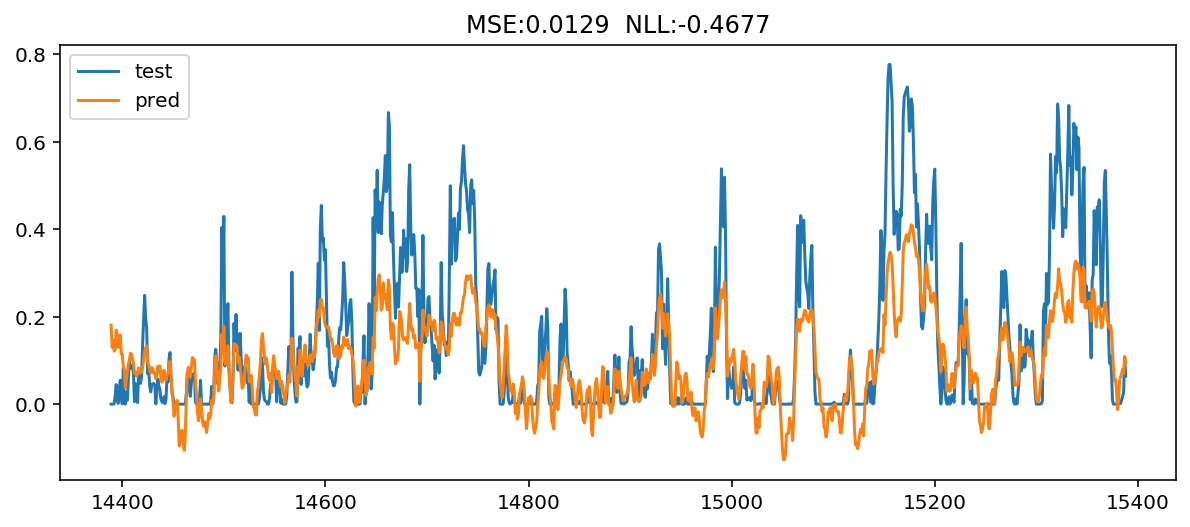

In [15]:
param = default_param

model_test(Base= esn_ridge_learner(
                    n_readout = param['n_readout'],
                    n_components = param['n_components'],
                    damping = param['damping'],
                    weight_scaling = param['weight_scaling'],
                    alpha = param['alpha']),
            n_estimators=500, verbose_eval=100,
            X_train=X_train, X_test=X_test,
            Y_train=Y_train, Y_test=Y_test)

### GA

NGBRegressor(Base=<ngboost.esn_learners.ESN_Ridge_learner object at 0x1a297ecac8>,
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=100) 

[iter 0] loss=0.0535 val_loss=0.0000 scale=0.5000 norm=0.2703
[iter 100] loss=-0.2848 val_loss=0.0000 scale=0.1250 norm=0.0630
[iter 200] loss=-0.3077 val_loss=0.0000 scale=0.0625 norm=0.0317
[iter 300] loss=-0.3092 val_loss=0.0000 scale=0.0156 norm=0.0079
[iter 400] loss=-0.3093 val_loss=0.0000 scale=0.0078 norm=0.0040

Test MSE 0.013522998022753294
Test NLL -0.46524042137651794


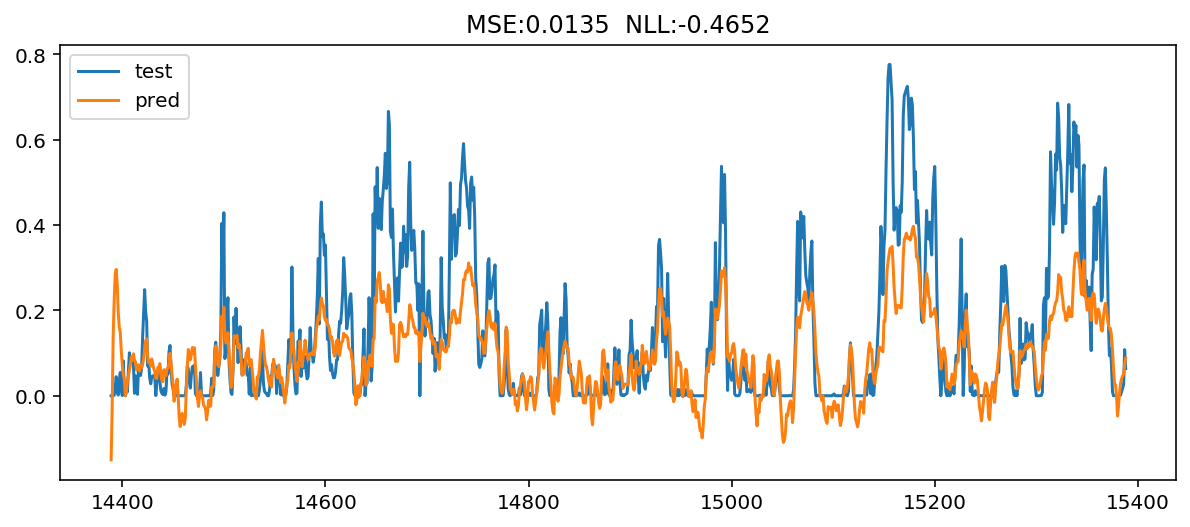

In [16]:
param = GA_param

model_test(Base= esn_ridge_learner(
                    n_readout = param['n_readout'],
                    n_components = param['n_components'],
                    damping = param['damping'],
                    weight_scaling = param['weight_scaling'],
                    alpha = param['alpha']),
            n_estimators=500, verbose_eval=100,
            X_train=X_train, X_test=X_test,
            Y_train=Y_train, Y_test=Y_test)

## ens  + ngboost( ridge ) 

### default

SimpleESN(damping=0.5, discard_steps=0, n_components=100, n_readout=1000,
          random_state=RandomState(MT19937) at 0x110FC0BA0, weight_scaling=0.9) 

NGBRegressor(Base=Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
                        normalize=False, random_state=None, solver='auto',
                        tol=0.001),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.CRPS'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=100) 

[iter 0] loss=0.1430 val_loss=0.0000 scale=0.2500 norm=0.6104
[iter 100] loss=0.0993 val_loss=0.0000 scale=0.0156 norm=0.0489
[iter 200] loss=0.0972 val_loss=0.0000 scale=0.0039 norm=0.0127
[iter 300] loss=0.0971 val_loss=0.0000 scale=0.0010 norm=0.0032
[iter 400] loss=0.0971 val_loss=0.0000 scale=0.0002 norm=0.0008

Test MSE 0.3714271560230767
Test NLL 11.804267207834316


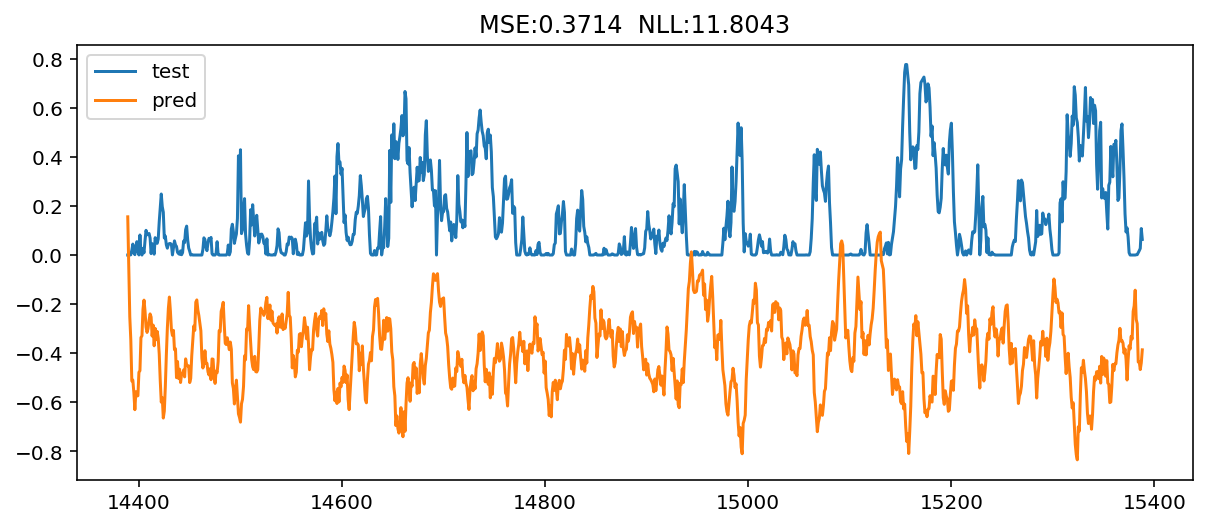

In [46]:
param = default_param.copy()
esn_param = param.copy()
del(esn_param['alpha'])
from sklearn.linear_model import Ridge
esn_model_test(Base=Ridge(alpha=param['alpha']), 
               esn_param = esn_param,
               n_estimators=500, verbose_eval=100, Score=CRPS,
               X_train=X_train, X_test=X_test,
               Y_train=Y_train, Y_test=Y_test)

### GA

SimpleESN(damping=0.26215546327467487, discard_steps=0, n_components=23,
          n_readout=3462, random_state=RandomState(MT19937) at 0x110FC0BA0,
          weight_scaling=0.6234509481681756) 

NGBRegressor(Base=Ridge(alpha=0.4649085531487292, copy_X=True,
                        fit_intercept=True, max_iter=None, normalize=False,
                        random_state=None, solver='auto', tol=0.001),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.CRPS'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=100) 

[iter 0] loss=0.1430 val_loss=0.0000 scale=0.2500 norm=0.6104
[iter 100] loss=0.1000 val_loss=0.0000 scale=0.0156 norm=0.0491
[iter 200] loss=0.0981 val_loss=0.0000 scale=0.0039 norm=0.0128
[iter 300] loss=0.0980 val_loss=0.0000 scale=0.0010 norm=0.0032
[iter 400] loss=0.0980 val_loss=0.0000 scale=0.0002 norm=0.0008

Test MSE 0.2516

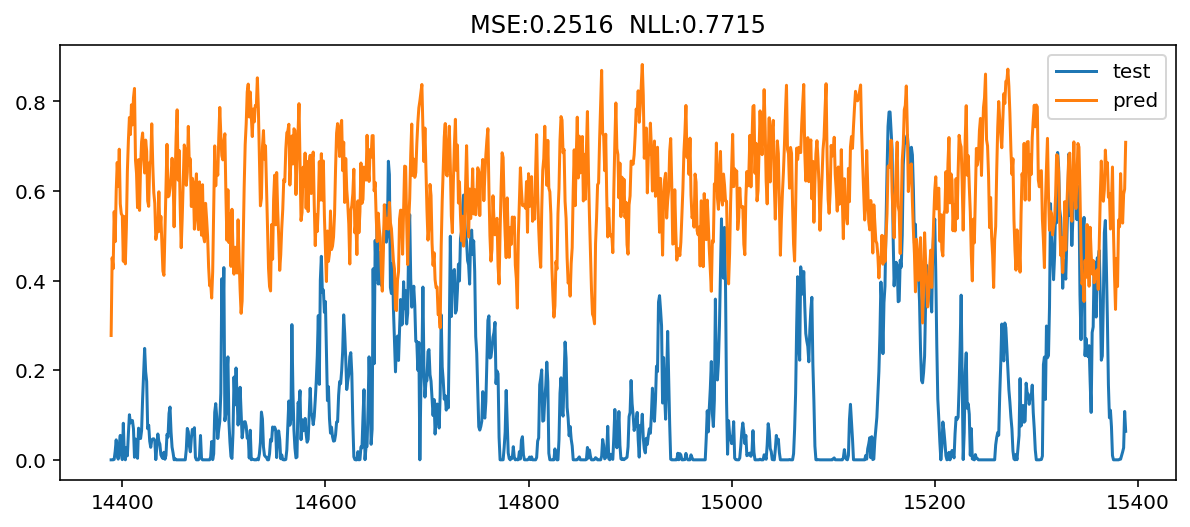

In [47]:
param = GA_param.copy()
esn_param = param.copy()
del(esn_param['alpha'])
from sklearn.linear_model import Ridge
esn_model_test(Base=Ridge(alpha=param['alpha']), 
               esn_param = esn_param,
               n_estimators=500, verbose_eval=100, Score=CRPS,
               X_train=X_train, X_test=X_test,
               Y_train=Y_train, Y_test=Y_test)